# Analysis of granural PAS data set

In [381]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [382]:
# download the data

data_15_17 = pd.read_csv(".\data\PAS_ward_level_FY_15_17.csv")
data_17_18 = pd.read_csv(".\data\PAS_ward_level_FY_17_18.csv")
data_18_19 = pd.read_csv(".\data\PAS_ward_level_FY_18_19.csv")
data_19_20 = pd.read_csv(".\data\PAS_ward_level_FY_19_20.csv")
data_20_21 = pd.read_csv(".\data\PAS_ward_level_FY_20_21.csv")


C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_28272\2865077880.py:3: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,35,177,410,411,412,415,416,417,418,419,420,421,422,423) have mixed types. Specify dtype option on import or set low_memory=False.
  data_15_17 = pd.read_csv(".\data\PAS_ward_level_FY_15_17.csv")
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_28272\2865077880.py:4: DtypeWarning: Columns (30,31,32,98,99,100,101,102,103,104,105,125,126,127,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  data_17_18 = pd.read_csv(".\data\PAS_ward_level_FY_17_18.csv")
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_28272\2865077880.py:5: DtypeWarning: Columns (25,26,27,28,108,109,110,112,113,137,202,203,381) have mixed types. Specify dtype option on import or set low_memory=False.
  data_18_19 = pd.read_csv(".\data\PAS_ward_level_FY_18_19.csv")
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_28272\2865077880.py:6: DtypeWa

# Working on spliting the years (creating the datetime object)

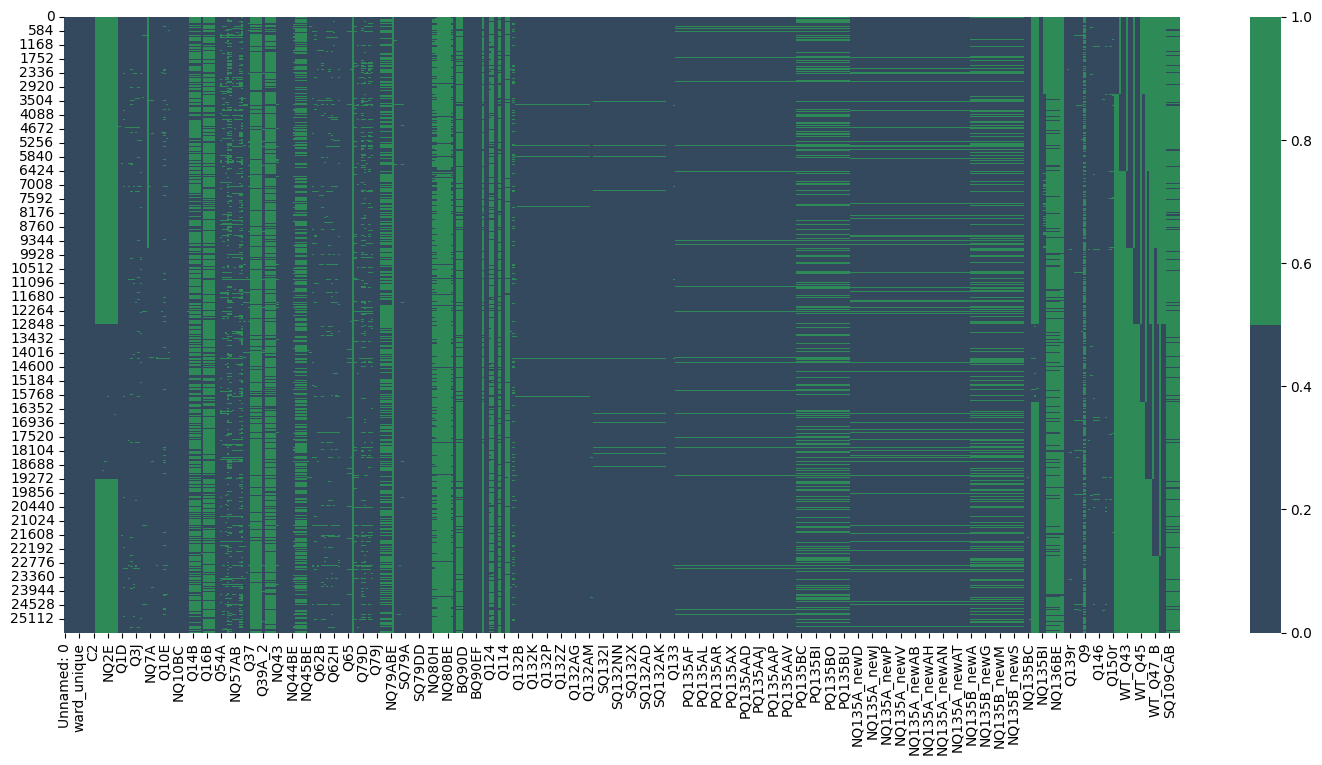

In [383]:
### Missing values
def plot_NAN(data):
    plt.figure(figsize=(18,8))

    colours = ['#34495E', 'seagreen'] 
    sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

plot_NAN(data_15_17)

In [384]:
data_15_17.head()

,Unnamed: 0,interview_date,MONTH,FinancialYear,ward,ward_n,ward_unique,SOA1,SOA2,BOROUGHNEIGHBOURHOOD,...,WT_Q47_E,WT_Q48,WT_Q48_B,WT_Q48_E,SQ109CAA,SQ109CAB,SQ109CAC,SQ109CAD,SQ109CAE,SQ109CAF
0,1,1.364783e+10,49 (Apr 2015),2015/16,E05009388,Abingdon,Abingdon - Kensington and Chelsea ...,E01002812,E02000589,Kensington and Chelsea - Kensington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.364783e+10,49 (Apr 2015),2015/16,E05009388,Abingdon,Abingdon - Kensington and Chelsea ...,E01002812,E02000589,Kensington and Chelsea - Kensington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.364766e+10,49 (Apr 2015),2015/16,E05009401,Queen's Gate,Queen's Gate - Kensington and Chelsea ...,E01002888,E02000589,Kensington and Chelsea - Kensington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.364766e+10,49 (Apr 2015),2015/16,E05009401,Queen's Gate,Queen's Gate - Kensington and Chelsea ...,E01002888,E02000589,Kensington and Chelsea - Kensington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.364999e+10,50 (May 2015),2015/16,E05009403,Royal Hospital,Royal Hospital - Kensington and Chelsea ...,E01002901,E02000594,Kensington and Chelsea - Chelsea,...,NaN,NaN,NaN,NaN,-,Police (other than Local Policing Team),-,-,-,-


In [385]:
### Functions to create datetime for entire data set

def month_transformation(month):
    month_info = {
        'Jan': 1,
        'Feb': 2, # For leap years, February has 29 days
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'Jun': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12
    }
    return  month_info[month]

def data_creation(row, col):
    month = row[col].split()[1][1:]
    year = row[col].split()[2][:-1]
    date_str = f'01/{month_transformation(month)}/{year}' # day of an interview unvailable -> always equal to 01
    date = pd.to_datetime(date_str,  format='%d/%m/%Y')
    return date


data_15_17["datetime"] = data_15_17.apply(data_creation, axis=1, args=("MONTH", ))


In [386]:
data_15 = data_15_17[data_15_17["datetime"].dt.year == 2015]
data_16 = data_15_17[data_15_17["datetime"].dt.year == 2016]
data_17 = data_15_17[data_15_17["datetime"].dt.year == 2017]

<Axes: >

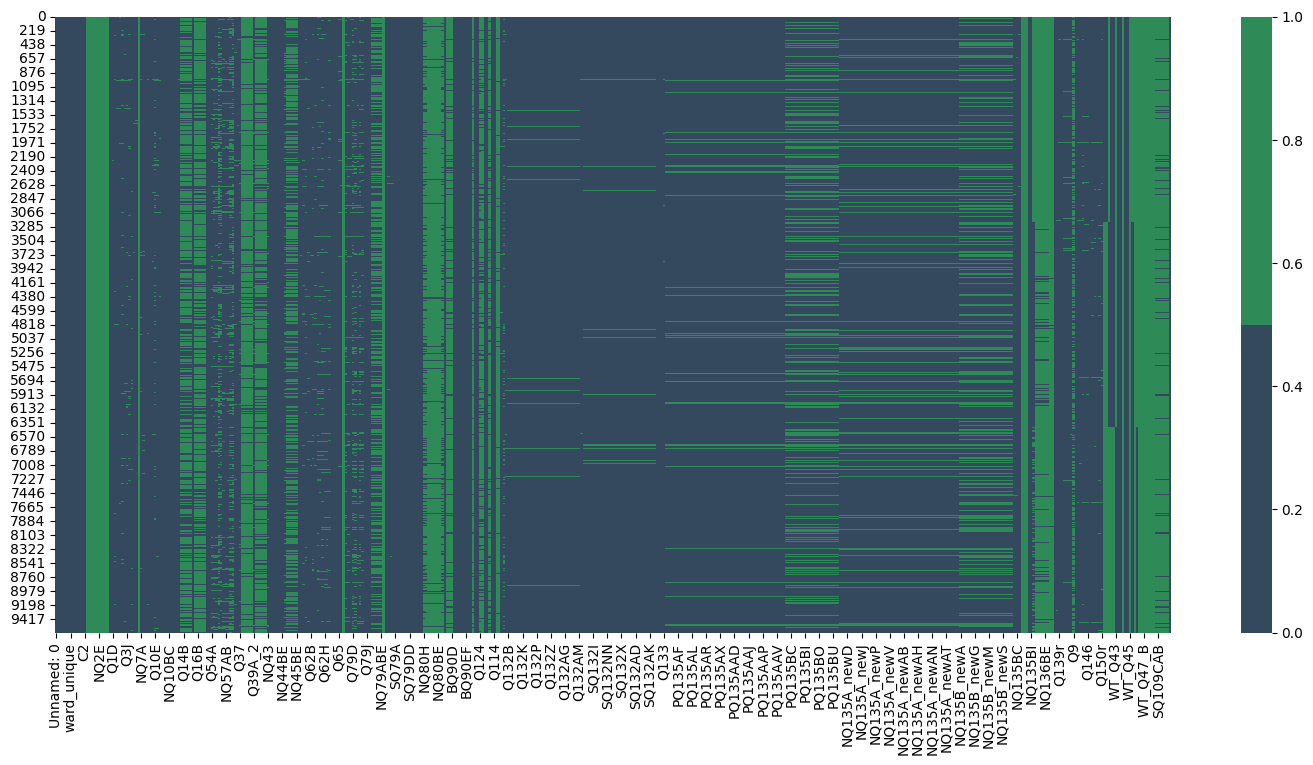

In [387]:

plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(data_15.isnull(), cmap=sns.color_palette(colours))

In [388]:
column_drop = ["BOROUGHNEIGHBOURHOOD",
    "Unnamed: 0",
    "interview_date",
    "MONTH",
    "FinancialYear",
    "ward",
    "SOA1",
    "SOA2",
    "quarter",
    "NQ1",
    "NQ2A",
    "NQ2B",
    "NQ2C",
    "NQ2D",
    "NQ2E",
    "NQ2F",
    "NQ2G",
    "NQ2H",
    "Q126DC",
    "Q106B"
]
data_15.drop(column_drop, axis='columns', inplace=True)

C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_28272\3064193054.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_15.drop(column_drop, axis='columns', inplace=True)


In [389]:
picked_columns = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q126DA",
    "Q126DB",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "Q119",
    "Q114",
    "NQ119",
    "PQ119",
    "A120",
    "Q133",
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ147r", 
    "NQ155r",
    "Q131",
    "Q148",
    "NQ149r",
    "Q150r",
]

data_15_17_special = data_15_17[picked_columns]
data_15_special = data_15[picked_columns]
data_16_special = data_16[picked_columns]
data_17_special = data_17[picked_columns]


In [26]:
#New columns in 17-18 that were not here before
data_17_1.columns.difference(data_17.columns)

Index(['BOROU0', 'BOROU1', 'BOROUGHNEIGHBOURHOODCODED', 'WARD_0', 'WARD_1',
       'WT_Q49', 'WT_Q49_B', 'WT_Q49_E', 'WT_Q50', 'WT_Q50_B', 'WT_Q50_E',
       'WT_Q51', 'WT_Q51_B', 'WT_Q51_E', 'WT_Q52', 'WT_Q52_B', 'WT_Q52_E',
       'XQ106B', 'XQ119A', 'XQ119B', 'XQ122', 'XQ123', 'XQ192', 'XQ21A',
       'XQ21B', 'XQ21C', 'XQ21D', 'XQ21E', 'XQ3A', 'XQ3B', 'XQ57A', 'XQ57B',
       'XQ57C', 'XQ8', 'XQ81', 'XQ81A', 'XQ81B', 'XQ9A', 'XQ9B', 'ZNQ10A',
       'ZNQ10BA', 'ZNQ10BB', 'ZNQ10BC', 'ZNQ10BD', 'ZNQ10BE', 'ZNQ10BF',
       'ZNQ119', 'ZPQ119', 'ZQ10A', 'ZQ10B', 'ZQ10C', 'ZQ10D', 'ZQ10E',
       'ZQ10F', 'ZQ10H', 'ZQ110'],
      dtype='object')

In [24]:
# Old columns that were removed in the new 17-18 
data_17_special.columns.difference(data_17_1.columns)
'''
NQ119: Prior to this experience, was your overall opinion of the police...? *** weird classification - changed it to XQ119A

PQ119: As a result of your contact with the police on this occasion, 
please tell me if your opinion is now better, worse or has not changed? *** - strange colour - changed it to XQ119A

Q110: Including anything you've already mentioned, 
in the last 12 months have the police stopped you while you were in the car or on foot? -- can be removed

Q114: In the last 12 months have the police searched or arrested you? * -- can be replaced NQ80BD

Q119: Thinking about all the times you have had contact with the police, 
are you satisfied, dissatisfied or neither with the service the police provided? - changed it to XQ119A

Q126DA How important is it to you that you have a say in how your local area is policed?  ** -- can be removed

Q126DB How important is it to you that you have a say in how London as a whole is policed? *** -- can be removed
'''

Index(['NQ119', 'PQ119', 'Q110', 'Q114', 'Q119', 'Q126DA', 'Q126DB'], dtype='object')

In [28]:
picked_columns_17_18 = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "A120",
    "Q133",
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ155r",
    "Q131",
    "Q148",
    "NQ149r",
    "Q150r",
    #NEW QUESTIONS
    "XQ106B",
    "NQ146",
    "XQ122",
    "XQ123",
    "XQ21A",
    "XQ21C",
    "XQ57A",
    "XQ57B",
    "XQ57C",
    "XQ8",
    "ZQ10A",
    "ZQ10B",
    "ZQ10C",
    "ZQ10D",
    "ZQ10E",
    "ZQ10F"
]
data_17_1_special = data_17_1[picked_columns_17_18]
data_18_special = data_18[picked_columns_17_18]

In [33]:
#New columns in 18-19 that were not here before
data_18_1.columns.difference(data_18.columns)

Index(['NQ135BK', 'NQ135BL', 'NQ135BM', 'NQ135BN', 'NQ46A', 'NQ46BA', 'NQ46BB',
       'NQ46BC', 'NQ46BD', 'NQ46BE', 'NQ47A', 'NQ47BA', 'NQ47BB', 'NQ47BC',
       'NQ47BD', 'NQ47BE', 'WT_Discrete', 'WT_Discrete_rebased', 'WT_Q53',
       'WT_Q53_B', 'WT_Q53_E', 'WT_Q54', 'WT_Q54_B', 'WT_Q54_E', 'WT_Q55',
       'WT_Q55_B', 'WT_Q55_E', 'WT_Q56', 'WT_Q56_B', 'WT_Q56_E', 'XBQ90A',
       'XQ57D', 'XQ59A', 'XQ59B', 'XQ59C', 'XQ59D', 'XQ82A', 'XQ82B', 'ZQ10I',
       'ZQ10J'],
      dtype='object')

In [34]:
# Old columns that were removed in the new 18-19 
data_18_special.columns.difference(data_18_1.columns)
# XQ21C: Some communities and individuals in your local area are more likely to experience crime than others

Index(['XQ21C'], dtype='object')

In [35]:
picked_columns_18_19 = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "A120",
    "Q133",
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ155r",
    "Q131",
    "Q148",
    "NQ149r",
    "Q150r",
    "XQ106B",
    "NQ146",
    "XQ122",
    "XQ123",
    "XQ21A",
    "XQ57A",
    "XQ57B",
    "XQ57C",
    "XQ8",
    "ZQ10A",
    "ZQ10B",
    "ZQ10C",
    "ZQ10D",
    "ZQ10E",
    "ZQ10F",
    #NEW QUESTIONS
    "NQ46A",
    "NQ46BA",
    "ZQ10I",
    "ZQ10J"
]
data_18_1_special = data_18_1[picked_columns_18_19]
data_19_special = data_19[picked_columns_18_19]

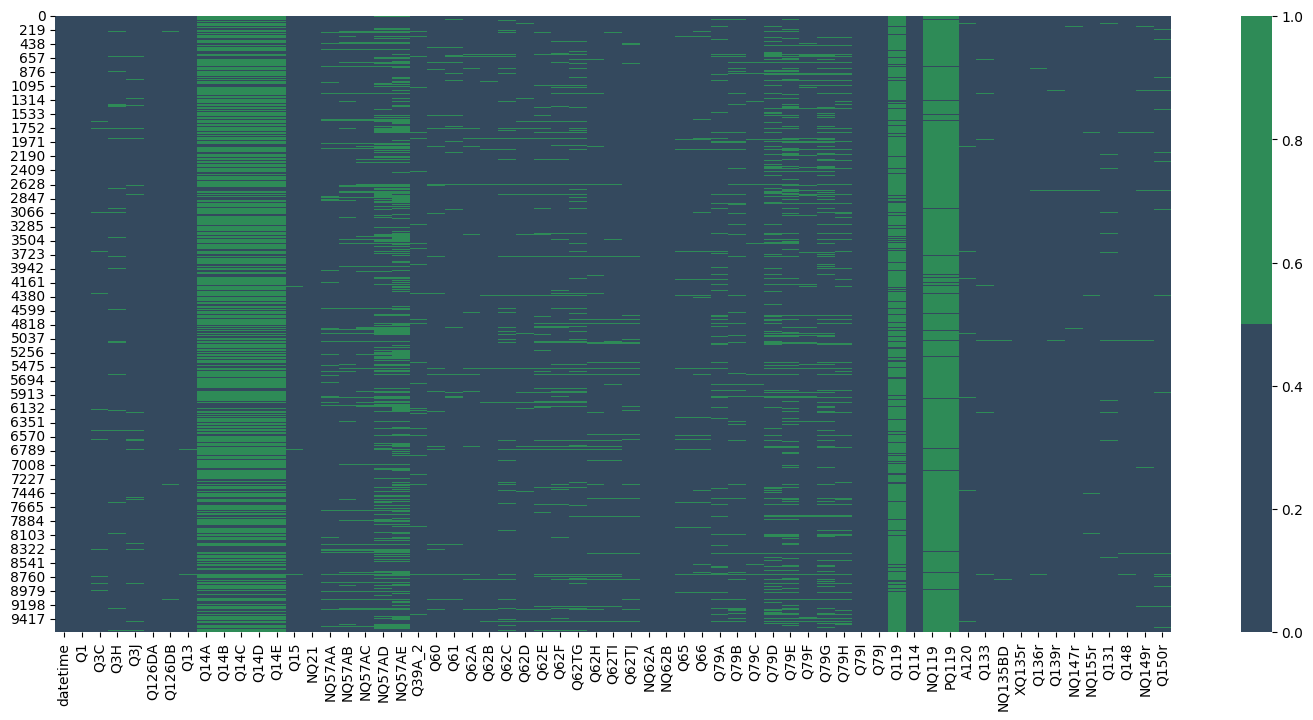

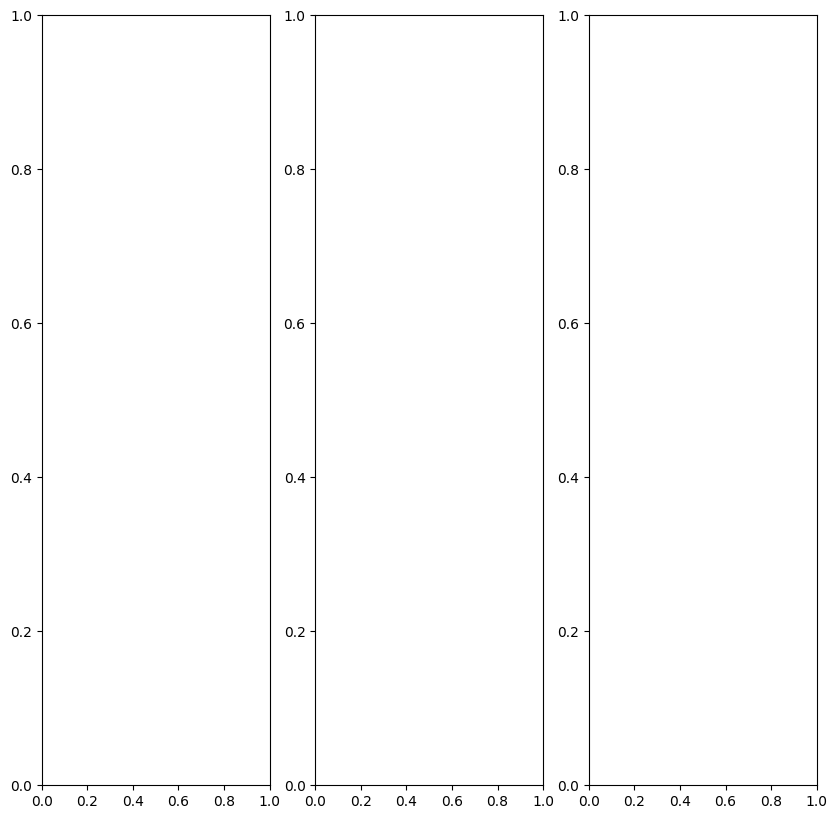

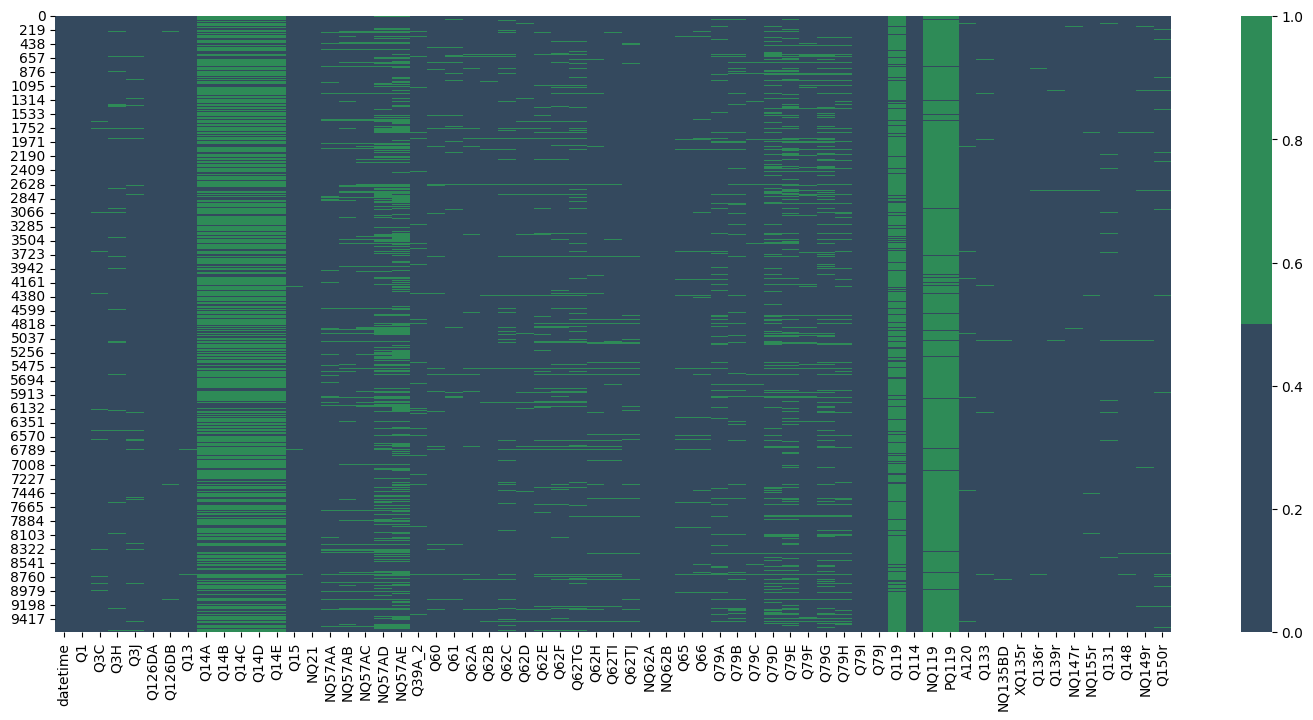

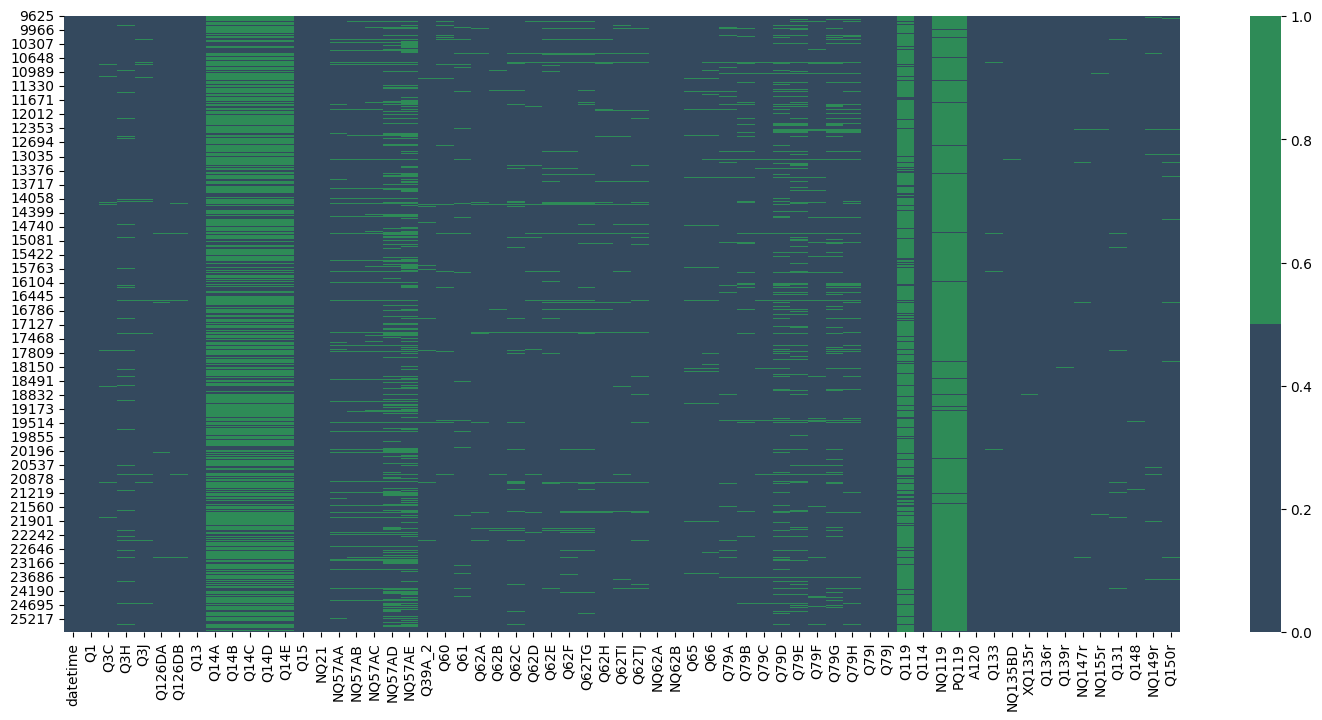

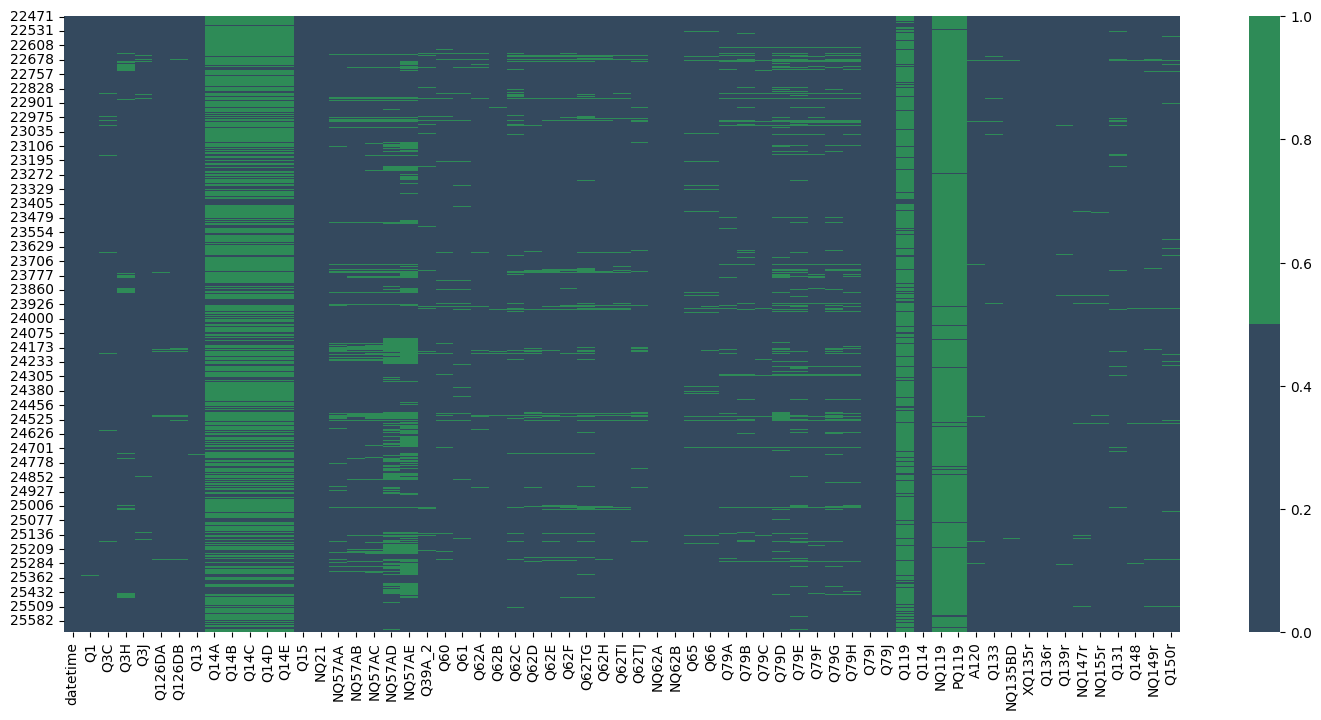

In [390]:
plot_NAN(data_15_special)

fig, axs = plt.subplots(1,3, figsize=(10, 10), sharex=True)

axs[0] = plot_NAN(data_15_special)
axs[1] = plot_NAN(data_16_special)
axs[2] = plot_NAN(data_17_special)

In [391]:

### strange in 2017 there are 1070 rows of only questions from 2017
data_15_special.shape, data_16_special.shape, data_17_special.shape
months_2017 = set()
for date in data_15_17["MONTH"]:
    month = date.split()[1][1:]
    year = date.split()[2][:-1]
    if year == "2017":
        months_2017.add(month)


months_2017, data_15_special.shape, data_16_special.shape, data_17_special.shape

({'Jan'}, (9625, 63), (14981, 63), (1070, 63))

# Encoding values - ordinal

In [392]:
### function for encoding ordinal and ordinal "like" data

def ordinal_encoder(data: pd.DataFrame, category: list[str], column: str, missing: int):
    encoder = OrdinalEncoder(categories=category, handle_unknown='use_encoded_value', unknown_value=missing)
    encoder.fit(data[[column]])
    data[column] = encoder.transform(data[[column]])

### creating encoded data set of all of the years
Encoded_df = data_15_17_special.copy()

### Q1 living in london 

    1	Less than 12 months
	2	12 months but less than 2 years
	3	2 years but less than 3 years
	4	3 years but less than 5 years
	5	5 years but less than 10 years
	6	10 years but less than 20 years
	7	20 years but less than 30 years
	8	30 years or more
    97	Don't know
	98	Refused
	99	Not Asked

In [393]:

cat_Q1 = [['Less than 12 months', '12 months but less than 2 years', '2 years but less than 3 years',
                 '3 years but less than 5 years', '5 years but less than 10 years', '10 years but less than 20 years',
                 '20 years but less than 30 years', '30 years or more']]

ordinal_encoder(Encoded_df, cat_Q1, "Q1", -1)

set(Encoded_df["Q1"])

{-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}

## Liker questions Q3C, Q3H, Q3J 
    1	Strongly agree
	2	Agree
	3	Neither agree nor disagree
	4	Disagree
	5	Strongly disagree
    97	Don't know
	98	Refused
	99	Not Asked

In [394]:

# list of columns being transformed
Q3 = ["Q3C", "Q3H", "Q3J"]
cat_Q3 = [["Strongly disagree", "Disagree", "Neither agree nor disagree", "Agree", "Strongly agree"]]

for name in Q3:
    ordinal_encoder(Encoded_df, cat_Q3, name, -1)



In [395]:
set(Encoded_df["Q3C"]), set(Encoded_df["Q3H"]), set(Encoded_df["Q3J"])

({-1.0, 0.0, 1.0, 2.0, 3.0, 4.0},
 {-1.0, 0.0, 1.0, 2.0, 3.0, 4.0},
 {-1.0, 0.0, 1.0, 2.0, 3.0, 4.0})

# Likert question Q60, Q61

    1	Excellent
	2	Good
	3	Fair
	4	Poor
	5	Very poor
    97	Don't know
	98	Refused
	99	Not Asked

In [396]:
Q60_61 = ["Q60", "Q61"]
cat_Q60_61 = [["Very poor", "Poor", "Fair", "Good", "Excellent"]]

for name in Q60_61:
    ordinal_encoder(Encoded_df, cat_Q60_61, name, -1)

In [397]:
set(Encoded_df["Q60"]), set(Encoded_df["Q61"])

({-1.0, 0.0, 1.0, 2.0, 3.0, 4.0}, {-1.0, 0.0, 1.0, 2.0, 3.0, 4.0})

# Linkert question Q62A, Q62B, Q62C, Q62D, Q62E, Q62F, Q62TG, Q62H, Q62TI, Q62TJ, NQ62B, A120, NQ135BD

    1	Strongly agree
	2	Tend to agree
	3	Neither agree nor disagree
	4	Tend to disagree
	5	Strongly disagree
    97	Don't know
	98	Refused
	99	Not Asked

In [398]:
Q62A_NQ135BD = ["Q62A", "Q62B", "Q62C", "Q62D", "Q62E", "Q62F", "Q62TG", "Q62H", "Q62TI", "Q62TJ", "NQ62B", "A120", "NQ135BD"]
cat_Q62A_NQ135BD= [["Strongly disagree", "Tend to disagree", "Neither agree nor disagree", "Tend to agree", "Strongly agree"]]

for name in Q62A_NQ135BD:
    ordinal_encoder(Encoded_df, cat_Q62A_NQ135BD, name, -1)


## Likert - worried scale Q13, Q15

    1	Very worried
	2	Fairly worried
	3	Not very worried
	4	Not at all worried
    97	Don't know
	98	Refused
	99	Not Asked

In [399]:
Q13_15 = ["Q13", "Q15"]
cat_Q13_15= [["Very worried", "Fairly worried", "Not very worried", "Not at all worried"]]

for name in Q13_15:
    ordinal_encoder(Encoded_df, cat_Q13_15, name, -1)

## PATROL FREQ Q65

    1	At least daily
	2	At least weekly
	3	At least fortnightly
	4	At least monthly
	5	Less often
	6	Never
    97	Don't know
	98	Refused
	99	Not Asked 

In [400]:

cat_Q65= [["Never", "Less often", "At least monthly", "At least fortnightly", "At least weekly", "At least daily"]]

ordinal_encoder(Encoded_df, cat_Q65, "Q65", -1)

 ## "Very important" scale Q126DA, Q126DB 

    1	Very important
	2	Fairly important
	3	Not very important
	4	Not at all important
	97	Don't know
	98	Refused
	99	Not Asked

In [401]:
Q126DA_B = ["Q126DA", "Q126DB" ]

cat_Q126DA_B= [["Not at all important", "Not very important", "Fairly important", "Very important"]]

for name in Q126DA_B:
    ordinal_encoder(Encoded_df, cat_Q126DA_B, name, -1)

In [402]:
set(Encoded_df["Q126DB"])

{-1.0, 0.0, 1.0, 2.0, 3.0}

## NQ21 HOW SAFE

    1	More safe
	2	Less safe
	3	It makes no difference
	97	Don't know
	98	Refused
	99	Not Asked

In [403]:

cat_NQ21= [["Less safe", "It makes no difference", "More safe"]]

ordinal_encoder(Encoded_df, cat_NQ21, "NQ21", -1)

In [404]:
set(Encoded_df["NQ21"])

{-1.0, 0.0, 1.0, 2.0}

# SATISFACTION WITH POLICE SURVELIENCE, NQ57AA, NQ57AB, NQ57AC, NQ57AD, NQ57AE POLICE CONTACT Q119

    1	Completely satisfied
	2	Very satisfied
	3	Fairly satisfied
	4	Neither satisfied nor dissatisfied
	5	Fairly dissatisfied
	6	Very dissatisfied
	7	Completely dissatisfied
    97	Don't know
	98	Refused
	99	Not Asked

In [405]:
NQ57AA_Q119 = ["NQ57AA", "NQ57AB", "NQ57AC", "NQ57AD", "NQ57AE", "Q119"]

cat_NQ57AA_Q119 = [["Completely dissatisfied", "Very dissatisfied", "Fairly dissatisfied", "Neither satisfied nor dissatisfied", 
                    "Fairly satisfied", "Very satisfied", "Completely satisfied"]]

for name in NQ57AA_Q119:
    ordinal_encoder(Encoded_df, cat_NQ57AA_Q119, name, -1)

# KNIFE CIRME Q39A_2

    1	Major problem
	2	Minor problem
	3	Not a problem at all
    97	Don't know
	98	Refused
	99	Not Asked

In [406]:
cat_Q39A_2 = [["Major problem", "Minor problem", "Not a problem at all"]]

ordinal_encoder(Encoded_df, cat_Q39A_2, "Q39A_2", -1)

set(Encoded_df["Q39A_2"])

{-1.0, 0.0, 1.0, 2.0}

## POLICE PREVENTS PROBLEMS... SCALE 1 - 7 (1 BAD JOB, 7 GREAT JOB) Q79A, Q79B, Q79C, Q79D, Q79E, Q79F Q79G, Q79H, Q79I, Q79J

    1	1 Not at all well
	2	2
	3	3
	4	4
	5	5
	6	6
	7	7 Very well


In [407]:
Q79A_J = ["Q79A", "Q79B", "Q79C", "Q79D", "Q79E", "Q79F", "Q79G", "Q79H", "Q79I", "Q79J"]

cat_Q79A_J = [["1 Not at all well", "2", "3", "4", "5", "6", "7 Very well"]]

for name in Q79A_J:
    ordinal_encoder(Encoded_df, cat_Q79A_J, name, -1)


## BIANRY OPTION IF A PERSON WS SEARCHED Q114, Q148	AND IF A PERSON WAS WELL INFORMED ABOUT POLIE GOALS NQ133
    1	Yes
	2	No
    97	Don't know
	98	Refused
	99	Not Asked

In [408]:
Q114_148 = [ "Q114", "Q148"]

cat_Q114_148 = [["No", "Yes"]]

for name in Q114_148:
    ordinal_encoder(Encoded_df, cat_Q114_148, name, -1)

## WHAT WAS THE OPINION BEFORE BEING SEARCHED NQ119, AFTER PQ119

    1	Generally high
	2	Generally low
	3	Mixed
	4	(spontaneous) No opinion
    97	Don't know
	98	Refused
	99	Not Asked

In [409]:
NQ119_PQ119 = ["NQ119", "PQ119"]

cat_NQ119_PQ119= [["Generally low", "Mixed", "Generally high"]]

for name in NQ119_PQ119:
    ordinal_encoder(Encoded_df, cat_NQ119_PQ119, name, -1)

## HOW WELL INFORMED Q131, Q133

    1	Very well informed
	2	Fairly well informed
	3	Not at all informed
    97	Don't know
	98	Refused
	99	Not Asked

In [410]:
Q131_133 = ["Q131", "Q133"]
cat_Q131_133 = [["Not at all informed", "Fairly well informed", "Very well informed"]]

for name in Q131_133:
    ordinal_encoder(Encoded_df, cat_Q131_133, name, -1)

## AGE Q136r 

    1	16-17
	2	18-21
	3	22-24
	4	25-34
	5	35-44
	6	45-54
	7	55-64
	8	65-74
	9	75-84
	10	85+
    97	Don't know
	98	Refused
	99	Not Asked

In [411]:

cat_Q136r = [["16-17", "18-21", "22-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]]

ordinal_encoder(Encoded_df, cat_Q136r, "Q136r", -1)

In [412]:
Encoded_df["Q136r"].unique()

array([ 4.,  3., -1.,  6.,  5.])

## NQ133  Do you know what your local policing team priorities are?

    1	Yes
	2	No
    97	Don't know
	98	Refused
	99	Not Asked

# Encoding values - nominal 

In [413]:
### funcction for one-hot encoding


def one_hot_encoder(data: pd.DataFrame, column: str, dummy_na: bool, drop_first: bool):
    df_one_hot = pd.get_dummies(data[column], prefix=column, dummy_na=dummy_na, drop_first=drop_first)
    data = pd.concat([data, df_one_hot], axis=1)
    data.drop(column, axis=1, inplace=True)
    return data


## ONE HOT ENCODING Q14
    1	Your personal experience
	2	The experience of someone you know
	3	What you have seen or heard in the media
	4	What you have seen in the area
	5	Other
	6	General feeling
	7	Groups of youths
	8	Threatening behaviour
	9	Have children/grandchildren
	10	Through work
	11	General concern about crime in area
	12	What you hear about in the area
	13	Worried more now due to deteriorating physical condition
    95	Not answered
	97	Don't know
	98	Refused
	99	Not asked

In [414]:
# for i in ['Q14A', 'Q14B', 'Q14C', 'Q14D', 'Q14E']:
#     print(Encoded_df[i].unique())


def encdoeQ14(response):
    if pd.notna(response) or response != "-":
        return True
    else:
        return False

for column in ['Q14A', 'Q14B', 'Q14C', 'Q14D', 'Q14E']:
    Encoded_df[column] = Encoded_df[column].apply(encdoeQ14)


    

In [415]:
Encoded_df.head()

,datetime,Q1,Q3C,Q3H,Q3J,Q126DA,Q126DB,Q13,Q14A,Q14B,...,NQ135BD,XQ135r,Q136r,Q139r,NQ147r,NQ155r,Q131,Q148,NQ149r,Q150r
0,2015-04-01,4.0,3.0,3.0,3.0,2.0,2.0,2.0,True,True,...,3.0,Female,4.0,Working FT,White British,UK,1.0,0.0,Christian,Heterosexual
1,2015-04-01,7.0,3.0,3.0,3.0,2.0,2.0,1.0,True,True,...,4.0,Female,3.0,Working FT,White British,UK,0.0,0.0,Other religion,Heterosexual
2,2015-04-01,4.0,-1.0,-1.0,3.0,2.0,2.0,3.0,True,True,...,4.0,Male,3.0,Student/Education,Asian,Non-UK,-1.0,0.0,No religion,NaN
3,2015-04-01,2.0,3.0,3.0,3.0,2.0,2.0,3.0,True,True,...,4.0,Male,-1.0,Student/Education,Asian,Non-UK,1.0,0.0,No religion,Non-Heterosexual
4,2015-05-01,1.0,3.0,3.0,3.0,2.0,2.0,2.0,True,True,...,4.0,Male,4.0,Working PT,White British,UK,0.0,0.0,No religion,Heterosexual


In [416]:
def get_columns_with_nan(data: pd.DataFrame) -> pd.DataFrame:
    # Identify columns with NaN values
    columns_with_nan = data.columns[data.isna().any()].tolist()
    
    # Extract columns with NaN values into a new DataFrame
    
    return columns_with_nan

get_columns_with_nan(Encoded_df)

['Q66', 'XQ135r', 'Q139r', 'NQ147r', 'NQ155r', 'NQ149r', 'Q150r']

## GENDER XQ135r 

    1	1 - Male
	2	2 - Female
	3	3 - Transgender
	4	4 - Intersex
    97	Don't know
	98	Refused
	99	Not Asked

In [417]:
nominal_encoding = ["XQ135r", "Q139r", "NQ149r", "NQ147r", "Q66", "Q150r", "NQ155r" ]
for col in nominal_encoding:
    Encoded_df = one_hot_encoder(Encoded_df, col, True, True)

## OCUUPATION Q139r 

    1	Full time (30+ hours per/week)
	2	Part time (8-29 hours per/week)
	3	Part time (less than 8 hours per/week)
	4	Not working
	5	House person
	6	Retired
	7	Registered unemployed
	8	Unemployed but not registered
	9	Student/full time education
	10	Other
    97	Don't know
	98	Refused
	99	Not Asked

## religion NQ149r 

    1	Christian (including Church of England, Catholic, Protestant and all other Christian denominations)
	2	Muslim
	3	Sikh
	4	Hindu
	5	Jewish
	6	Buddhist
	7	Other
	8	No religion/atheist/agnostic

## race NQ147r   -> ['White British', 'Asian', 'White Other', 'Black', 'Other', nan, 'Mixed']

    1	English
	2	Akan (Ashanti)
	3	Arabic
	4	Bengali and Sylheti
	5	Cantonese
	6	English-based Creoles
	7	French
	8	German
	9	Greek
	10	Gujarati
	11	Hindi/Urdu
	12	Panjabi
	13	Polish
	14	Portuguese
	15	Somali
	16	Spanish
	17	Turkish
	18	Yoruba (Nigeria)
	90	Other
    97	Don't know
	98	Refused
	99	Not Asked

## WHAT PEOPLE THINK REGARDING PATROL FREQ Q66 

    1	Not often enough
	2	About right
	3	Too often
    97	Don't know
	98	Refused
	99	Not Asked

# sexuality Q150r

    1	Heterosexual(orientation towards people of the opposite sex)
	2	Gay/lesbian (orientation towards people of the same sex)
	3	Bisexual (orientation towards people of the same and opposite sex)
	4	None of these
    97	Don't know
	98	Refused
	99	Not Asked

In [418]:
Encoded_df.head()

,datetime,Q1,Q3C,Q3H,Q3J,Q126DA,Q126DB,Q13,Q14A,Q14B,...,NQ147r_White British,NQ147r_White Other,NQ147r_nan,Q66_Not often enough,Q66_Too often,Q66_nan,Q150r_Non-Heterosexual,Q150r_nan,NQ155r_UK,NQ155r_nan
0,2015-04-01,4.0,3.0,3.0,3.0,2.0,2.0,2.0,True,True,...,True,False,False,False,False,False,False,False,True,False
1,2015-04-01,7.0,3.0,3.0,3.0,2.0,2.0,1.0,True,True,...,True,False,False,False,False,False,False,False,True,False
2,2015-04-01,4.0,-1.0,-1.0,3.0,2.0,2.0,3.0,True,True,...,False,False,False,False,False,False,False,True,False,False
3,2015-04-01,2.0,3.0,3.0,3.0,2.0,2.0,3.0,True,True,...,False,False,False,False,False,False,True,False,False,False
4,2015-05-01,1.0,3.0,3.0,3.0,2.0,2.0,2.0,True,True,...,True,False,False,False,False,False,False,False,True,False


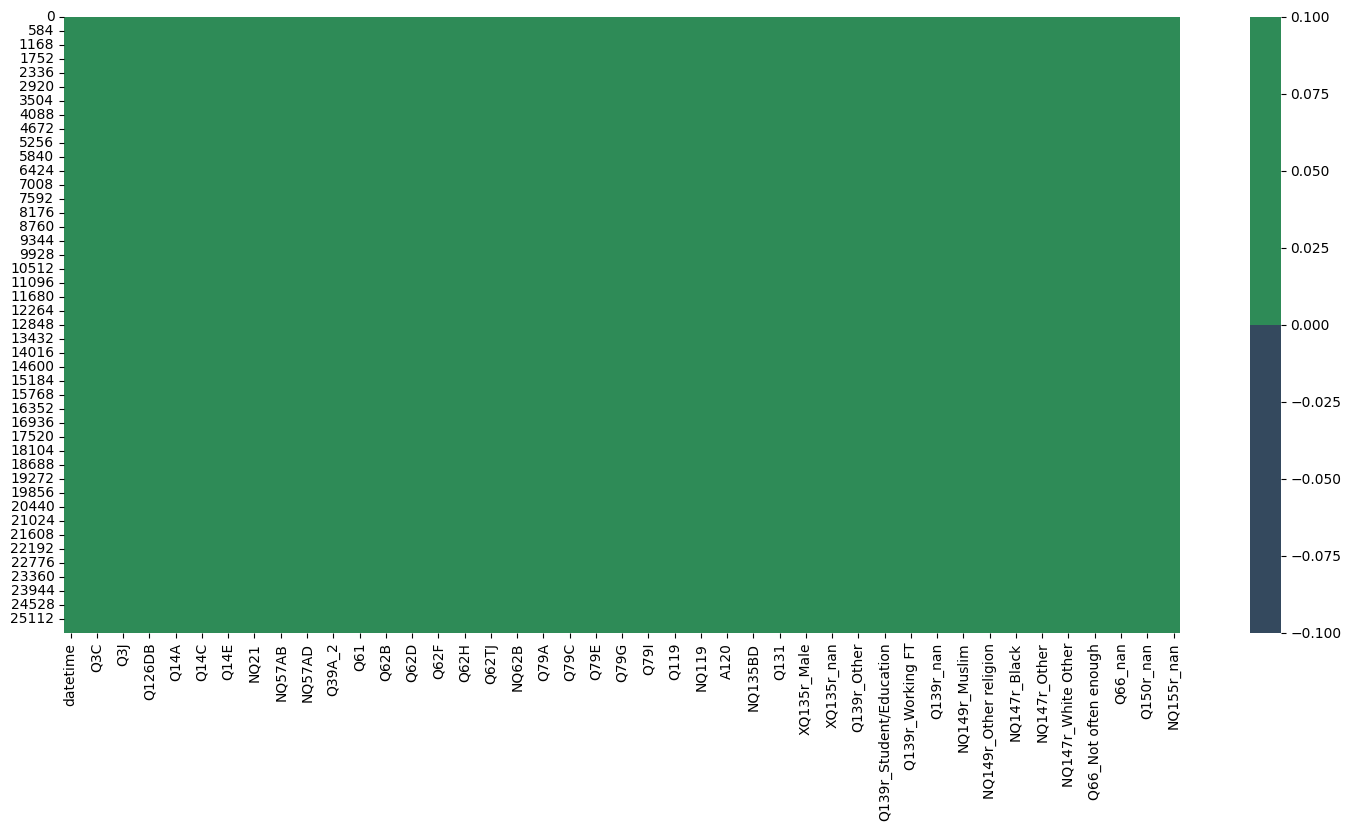

In [419]:

plot_NAN(Encoded_df)
